# Task-2 (Beginner Level) : 
# Stock Market Prediction and Forecasting using Stacked LSTM


# Author : Nishigandha Satav

# ------------------------------------------------------------------------------------------------------------ #

# Importing Required Libraries

In [2]:
#Open Source Library, built on top of Numpy. For importing and analyzing data.
import pandas as pd  

#For data visualization
import matplotlib.pyplot as plt 
%matplotlib inline

#core library for scientific computing
import numpy as np 

# LSTM are sensitive to the scale of the data. so we apply MinMax scaler
# For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. 
# The range is the difference between the original maximum and original minimum.
from sklearn.preprocessing import MinMaxScaler 

# For Creating Stacked LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Mean Squared Error (MSE) is a common way to measure the prediction accuracy of a model 
# MSE = (1/n)*sum(actual-prediction)^2
# n : sample size || actual : the actual data value || prediction : the predicted data value
import math
from sklearn.metrics import mean_squared_error

# Reading CSV into Dataframe

In [3]:
df = pd.read_csv('NSE-TATAGLOBAL.csv')

In [4]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


# Analyzing Data

In [5]:
df.shape

(2035, 8)

In [6]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [7]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
df1 = df.reset_index()['Close']

In [10]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [11]:
df1.shape

(2035,)

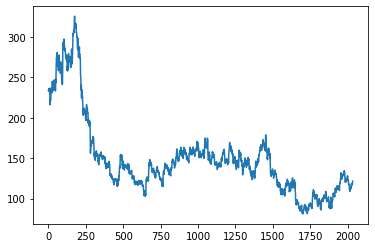

In [12]:
plt.plot(df1)

# Scaling Data

In [13]:
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

# Preprocess the Data - Train and Test

In [14]:
train_data_size = int(len(df1)*0.75)
test_data_size = len(df1) - train_data_size

In [15]:
train_data_size

1526

In [16]:
test_data_size

509

In [17]:
train_data,test_data = df1[0:train_data_size,:],df1[train_data_size:len(df1),:1]

In [18]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.18831699],
       [0.18811275],
       [0.17034314]])

In [19]:
test_data

array([[0.1621732 ],
       [0.15972222],
       [0.16278595],
       [0.17340686],
       [0.14174837],
       [0.15441176],
       [0.16503268],
       [0.15563725],
       [0.14460784],
       [0.13684641],
       [0.13582516],
       [0.14072712],
       [0.14501634],
       [0.14195261],
       [0.13562092],
       [0.15053105],
       [0.15727124],
       [0.15461601],
       [0.15767974],
       [0.15114379],
       [0.14297386],
       [0.14215686],
       [0.14787582],
       [0.13970588],
       [0.11642157],
       [0.11131536],
       [0.10927288],
       [0.10334967],
       [0.09783497],
       [0.10089869],
       [0.10906863],
       [0.10171569],
       [0.11254085],
       [0.12704248],
       [0.12214052],
       [0.12704248],
       [0.11519608],
       [0.11008987],
       [0.0996732 ],
       [0.09640523],
       [0.10089869],
       [0.10886438],
       [0.10866013],
       [0.1186683 ],
       [0.12316176],
       [0.11029412],
       [0.11703431],
       [0.110

In [20]:
def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [21]:
time_step = 100
x_train, y_train = create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data,time_step)

In [22]:
x_train.shape

(1425, 100)

In [23]:
x_train

array([[0.62418301, 0.62214052, 0.62622549, ..., 0.83455882, 0.86213235,
        0.85273693],
       [0.62214052, 0.62622549, 0.63378268, ..., 0.86213235, 0.85273693,
        0.87111928],
       [0.62622549, 0.63378268, 0.62234477, ..., 0.85273693, 0.87111928,
        0.84497549],
       ...,
       [0.32271242, 0.3247549 , 0.32148693, ..., 0.1997549 , 0.2001634 ,
        0.20506536],
       [0.3247549 , 0.32148693, 0.32352941, ..., 0.2001634 , 0.20506536,
        0.2005719 ],
       [0.32148693, 0.32352941, 0.3255719 , ..., 0.20506536, 0.2005719 ,
        0.18831699]])

In [24]:
y_train.shape

(1425,)

In [25]:
y_train

array([0.87111928, 0.84497549, 0.84027778, ..., 0.2005719 , 0.18831699,
       0.18811275])

In [26]:
x_test.shape

(408, 100)

In [27]:
x_test

array([[0.1621732 , 0.15972222, 0.16278595, ..., 0.14644608, 0.15216503,
        0.1435866 ],
       [0.15972222, 0.16278595, 0.17340686, ..., 0.15216503, 0.1435866 ,
        0.13419118],
       [0.16278595, 0.17340686, 0.14174837, ..., 0.1435866 , 0.13419118,
        0.1431781 ],
       ...,
       [0.13827614, 0.13541667, 0.13010621, ..., 0.14562908, 0.15236928,
        0.15400327],
       [0.13541667, 0.13010621, 0.12254902, ..., 0.15236928, 0.15400327,
        0.14971405],
       [0.13010621, 0.12254902, 0.12479575, ..., 0.15400327, 0.14971405,
        0.1621732 ]])

In [28]:
y_test.shape

(408,)

In [29]:
y_test

array([0.13419118, 0.1431781 , 0.16115196, 0.16176471, 0.17320261,
       0.18218954, 0.16237745, 0.13112745, 0.15931373, 0.15951797,
       0.14808007, 0.16278595, 0.15625   , 0.16319444, 0.16360294,
       0.16278595, 0.16544118, 0.15522876, 0.17197712, 0.1503268 ,
       0.13255719, 0.14338235, 0.15849673, 0.1186683 , 0.11519608,
       0.10947712, 0.0692402 , 0.06597222, 0.05841503, 0.05044935,
       0.04534314, 0.04779412, 0.05290033, 0.04922386, 0.06638072,
       0.07169118, 0.05392157, 0.04881536, 0.04881536, 0.05310458,
       0.04963235, 0.05065359, 0.05126634, 0.04963235, 0.05902778,
       0.05555556, 0.04084967, 0.03737745, 0.03737745, 0.02655229,
       0.02879902, 0.0316585 , 0.0316585 , 0.03635621, 0.02205882,
       0.01674837, 0.01450163, 0.02226307, 0.03615196, 0.02675654,
       0.03206699, 0.02696078, 0.03574346, 0.03594771, 0.04044118,
       0.03921569, 0.04411765, 0.02982026, 0.0122549 , 0.01286765,
       0.01143791, 0.00245098, 0.0059232 , 0.        , 0.00714

In [30]:
#reshape input to be [samples, time steps, features] which is required for LSTM
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [31]:
x_train

array([[[0.62418301],
        [0.62214052],
        [0.62622549],
        ...,
        [0.83455882],
        [0.86213235],
        [0.85273693]],

       [[0.62214052],
        [0.62622549],
        [0.63378268],
        ...,
        [0.86213235],
        [0.85273693],
        [0.87111928]],

       [[0.62622549],
        [0.63378268],
        [0.62234477],
        ...,
        [0.85273693],
        [0.87111928],
        [0.84497549]],

       ...,

       [[0.32271242],
        [0.3247549 ],
        [0.32148693],
        ...,
        [0.1997549 ],
        [0.2001634 ],
        [0.20506536]],

       [[0.3247549 ],
        [0.32148693],
        [0.32352941],
        ...,
        [0.2001634 ],
        [0.20506536],
        [0.2005719 ]],

       [[0.32148693],
        [0.32352941],
        [0.3255719 ],
        ...,
        [0.20506536],
        [0.2005719 ],
        [0.18831699]]])

In [32]:
x_test

array([[[0.1621732 ],
        [0.15972222],
        [0.16278595],
        ...,
        [0.14644608],
        [0.15216503],
        [0.1435866 ]],

       [[0.15972222],
        [0.16278595],
        [0.17340686],
        ...,
        [0.15216503],
        [0.1435866 ],
        [0.13419118]],

       [[0.16278595],
        [0.17340686],
        [0.14174837],
        ...,
        [0.1435866 ],
        [0.13419118],
        [0.1431781 ]],

       ...,

       [[0.13827614],
        [0.13541667],
        [0.13010621],
        ...,
        [0.14562908],
        [0.15236928],
        [0.15400327]],

       [[0.13541667],
        [0.13010621],
        [0.12254902],
        ...,
        [0.15236928],
        [0.15400327],
        [0.14971405]],

       [[0.13010621],
        [0.12254902],
        [0.12479575],
        ...,
        [0.15400327],
        [0.14971405],
        [0.1621732 ]]])

# Creating an Stacked LSTM Model

In [34]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# Training Model

In [36]:
# Training Model
# Epoch : Epoch is when an entire dataset is passed forward and backward through the neural network only once.
# Since one epoch is too big to feed to the computer at once we divide it in several smaller batches
# Batch : As we can't pass the entire dataset into neural network at once so we divide dataset into number of batches.
# Batch_size : Total number of training examples present in a single batch.
# Verbose : It is a choice that how you want to see the output of your neural network while it is trained. It has only two 
# values either 0 or 1. If set to 0 it will show nothing. if set to 1 then after every epoch you will get to see if your model 
# has been improved or not. 

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Train on 1425 samples, validate on 408 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
1425/1425 [==============================] - 23s 16ms/sample - loss: 0.0283 - val_loss: 0.0068
Epoch 2/100
1425/1425 [==============================] - 9s 6ms/sample - loss: 0.0032 - val_loss: 0.0015
Epoch 3/100
1425/1425 [==============================] - 9s 6ms/sample - loss: 0.0018 - val_loss: 0.0011
Epoch 4/100
1425/1425 [==============================] - 9s 6ms/sample - loss: 0.0014 - val_loss: 0.0011
Epoch 5/100
1425/1425 [==============================] - 9s 6ms/sample - loss: 0.0014 - val_loss: 0.0015
Epoch 6/100
1425/1425 [==============================] - 9s 6ms/sample - loss: 0.0013 - val_loss: 0.0011
Epoch 7/100
1425/1425 [==============================] - 9s 6ms/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 8/100
1425/1425 [==============================] - 9s 6ms/sample - loss: 0.0012 - val_loss: 0.0013
Epoch 9/100
1425/

# Prediction

In [37]:
#prediction
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [38]:
train_predict

array([[0.84713525],
       [0.8702498 ],
       [0.8491372 ],
       ...,
       [0.20454949],
       [0.20520392],
       [0.19929948]], dtype=float32)

In [39]:
test_predict

array([[0.15184115],
       [0.14517327],
       [0.14343482],
       [0.15126656],
       [0.16012695],
       [0.16976826],
       [0.17931418],
       [0.17676595],
       [0.15827228],
       [0.1529585 ],
       [0.15585317],
       [0.15586765],
       [0.15996824],
       [0.16183881],
       [0.16449527],
       [0.16666017],
       [0.16733012],
       [0.16814397],
       [0.16475411],
       [0.16760477],
       [0.163567  ],
       [0.15145995],
       [0.14566787],
       [0.15073238],
       [0.14322364],
       [0.13192755],
       [0.12227731],
       [0.10388317],
       [0.08766318],
       [0.07616138],
       [0.0680455 ],
       [0.06229544],
       [0.05983405],
       [0.06089142],
       [0.06209983],
       [0.0672991 ],
       [0.07441022],
       [0.07485288],
       [0.07001088],
       [0.06447791],
       [0.06179311],
       [0.06038507],
       [0.06003086],
       [0.06035883],
       [0.06040124],
       [0.06276418],
       [0.06469441],
       [0.061

In [40]:
#Transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [41]:
train_predict

array([[288.3287 ],
       [293.98715],
       [288.8188 ],
       ...,
       [131.02371],
       [131.18391],
       [129.73851]], dtype=float32)

In [42]:
test_predict

array([[118.12071 ],
       [116.48841 ],
       [116.06284 ],
       [117.98005 ],
       [120.14908 ],
       [122.50928 ],
       [124.846115],
       [124.2223  ],
       [119.69505 ],
       [118.39423 ],
       [119.10285 ],
       [119.1064  ],
       [120.11022 ],
       [120.56814 ],
       [121.21844 ],
       [121.748405],
       [121.912415],
       [122.11164 ],
       [121.2818  ],
       [121.97965 ],
       [120.9912  ],
       [118.02739 ],
       [116.60949 ],
       [117.84928 ],
       [116.01115 ],
       [113.245865],
       [110.88349 ],
       [106.3806  ],
       [102.40994 ],
       [ 99.59431 ],
       [ 97.60754 ],
       [ 96.19992 ],
       [ 95.59738 ],
       [ 95.85622 ],
       [ 96.15204 ],
       [ 97.42482 ],
       [ 99.16563 ],
       [ 99.27399 ],
       [ 98.08866 ],
       [ 96.734184],
       [ 96.07696 ],
       [ 95.73227 ],
       [ 95.64555 ],
       [ 95.72584 ],
       [ 95.73622 ],
       [ 96.31467 ],
       [ 96.78719 ],
       [ 96.0

In [43]:
#RMSE : Root Mean Square Error - In simple words it is used to evaluate trained models for usefulness/accuracy

#RMSE of training data
math.sqrt(mean_squared_error(y_train,train_predict))

163.86800814213453

In [44]:
#RMSE of testing data
math.sqrt(mean_squared_error(y_test,test_predict))

106.04337669057576

In [45]:
rsme = np.sqrt(np.mean(test_predict-y_test)**2)

In [46]:
rsme

105.28500584665055

# Plotting the Output

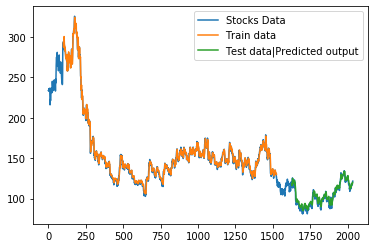

In [47]:
#shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

#shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Stocks Data','Train data','Test data|Predicted output'],loc='upper right')
plt.show()